# 데이터 시각화 4주차 실습 - 데이터 결측치 처리하기

# 데이터 분석 준비

In [7]:
# 관련 라이브러리 불러오기
import pandas as pd           #판다스
import matplotlib as mpl       #맷플롭립
import matplotlib.pylab as plt   #맷플롭립
import seaborn as sns          #시본 
import numpy as np           #넘파이

# 데이터 불러오기 

## 데이터 불러오기 및 원본데이터 저장

In [8]:
#타이타닉 데이터 파일경로를 찾고 변수 file_path에 저장
file_path= '/Users/seohuiwon/Desktop/School/2023/pythonpratice/DataVIsualization/Data/지자체별문화예산정보.csv'

df = pd.read_csv(file_path) #read csv()함수로 데이터프레임 변환 
df

,SEQ_NO,FINAN_YEAR,ADMNSTMACH_CD,ADMNSTMACH_NM,TOT_ANEXPTR_BUDGET_PRICE,BEFORE_YEAR_ANEXPTR_BUDGET_PRICE,ANEXPTR_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_PRICE,BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE,CLTUR_TURSM_BUDGET_IRDS_RT,CLTUR_TURSM_BUDGET_RATE,TOT_POPLTN_CO,ONE_PSNBY_CLTUR_TURSM_BUDGET_PRICE
0,1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
1,2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
2,3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
3,4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
4,5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1700,2022,4886000000,경상남도 산청군,6.410598e+11,5.119109e+11,25.23,3.140200e+09,3.014622e+09,4.17,0.49,36098,86991.0
1700,1701,2022,4887000000,경상남도 함양군,5.755567e+11,5.369389e+11,7.19,6.944940e+08,9.706260e+08,-28.45,0.12,40241,17258.0
1701,1702,2022,4888000000,경상남도 거창군,8.519056e+11,8.299435e+11,2.65,3.005200e+08,2.485440e+08,20.91,0.04,63308,4747.0
1702,1703,2022,4889000000,경상남도 합천군,7.510036e+11,6.765212e+11,11.01,2.369050e+09,1.993230e+09,18.85,0.32,48026,49328.0


In [9]:
column = pd.read_excel('/Users/seohuiwon/Desktop/School/2023/pythonpratice/DataVIsualization/Data/지자체별문화예산정보컬럼정의.xls')

In [10]:
column

,순서,컬럼영문명,컬럼한글명,데이터타입,길이,PK여부,NOT NULL여부
0,1,SEQ_NO,일련번호,DECIMAL,30,Y,Y
1,2,FINAN_YEAR,회계년도,VARCHAR,4,N,N
2,3,ADMNSTMACH_CD,행정기관코드,VARCHAR,30,N,N
3,4,ADMNSTMACH_NM,행정기관명,VARCHAR,200,N,N
4,5,TOT_ANEXPTR_BUDGET_PRICE,총세출예산금액,DECIMAL,"28,5",N,N
5,6,BEFORE_YEAR_ANEXPTR_BUDGET_PRICE,이전년도세출예산금액,DECIMAL,"28,5",N,N
6,7,ANEXPTR_BUDGET_IRDS_RT,세출예산증감율,DECIMAL,"28,5",N,N
7,8,CLTUR_TURSM_BUDGET_PRICE,문화관광예산금액,DECIMAL,"28,5",N,N
8,9,BEFORE_YEAR_CLTUR_TURSM_BUDGET_PRICE,이전년도문화관광예산금액,DECIMAL,"28,5",N,N
9,10,CLTUR_TURSM_BUDGET_IRDS_RT,문화관광예산증감율,DECIMAL,"28,5",N,N


In [11]:
# 컬럼 한글명으로 교체
df.columns = column['컬럼한글명']

In [12]:
df

컬럼한글명,일련번호,회계년도,행정기관코드,행정기관명,총세출예산금액,이전년도세출예산금액,세출예산증감율,문화관광예산금액,이전년도문화관광예산금액,문화관광예산증감율,문화관광예산비율,총인구수,1인당문화관광예산금액
0,1,2016,1100000000,서울특별시,2.927279e+13,2.665722e+13,9.81,5.632196e+10,4.073831e+10,38.25,0.19,9857426,5714.0
1,2,2016,1111000000,서울특별시 종로구,4.323427e+11,4.126964e+11,4.76,3.850000e+08,4.800000e+07,702.08,0.09,152737,2521.0
2,3,2016,1114000000,서울특별시 중구,4.145856e+11,3.621207e+11,14.49,1.384890e+08,2.006800e+07,590.10,0.03,125249,1106.0
3,4,2016,1117000000,서울특별시 용산구,3.669454e+11,3.428220e+11,7.04,2.170000e+07,2.170000e+07,0.00,0.01,230241,94.0
4,5,2016,1120000000,서울특별시 성동구,4.167871e+11,3.916280e+11,6.42,4.600000e+07,4.600000e+07,0.00,0.01,299259,154.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,1700,2022,4886000000,경상남도 산청군,6.410598e+11,5.119109e+11,25.23,3.140200e+09,3.014622e+09,4.17,0.49,36098,86991.0
1700,1701,2022,4887000000,경상남도 함양군,5.755567e+11,5.369389e+11,7.19,6.944940e+08,9.706260e+08,-28.45,0.12,40241,17258.0
1701,1702,2022,4888000000,경상남도 거창군,8.519056e+11,8.299435e+11,2.65,3.005200e+08,2.485440e+08,20.91,0.04,63308,4747.0
1702,1703,2022,4889000000,경상남도 합천군,7.510036e+11,6.765212e+11,11.01,2.369050e+09,1.993230e+09,18.85,0.32,48026,49328.0


In [13]:
# 결측치 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   일련번호          1704 non-null   int64  
 1   회계년도          1704 non-null   int64  
 2   행정기관코드        1704 non-null   int64  
 3   행정기관명         1704 non-null   object 
 4   총세출예산금액       1701 non-null   float64
 5   이전년도세출예산금액    1701 non-null   float64
 6   세출예산증감율       1701 non-null   float64
 7   문화관광예산금액      1701 non-null   float64
 8   이전년도문화관광예산금액  1701 non-null   float64
 9   문화관광예산증감율     1647 non-null   float64
 10  문화관광예산비율      1701 non-null   float64
 11  총인구수          1704 non-null   int64  
 12  1인당문화관광예산금액   1701 non-null   float64
dtypes: float64(8), int64(4), object(1)
memory usage: 173.2+ KB


In [14]:
df_raw = df

## 결측치 확인하기

In [15]:
df.isnull()

컬럼한글명,일련번호,회계년도,행정기관코드,행정기관명,총세출예산금액,이전년도세출예산금액,세출예산증감율,문화관광예산금액,이전년도문화관광예산금액,문화관광예산증감율,문화관광예산비율,총인구수,1인당문화관광예산금액
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,False,False,False,False,False,False,False,False,False,False,False,False,False
1700,False,False,False,False,False,False,False,False,False,False,False,False,False
1701,False,False,False,False,False,False,False,False,False,False,False,False,False
1702,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()

컬럼한글명
일련번호             0
회계년도             0
행정기관코드           0
행정기관명            0
총세출예산금액          3
이전년도세출예산금액       3
세출예산증감율          3
문화관광예산금액         3
이전년도문화관광예산금액     3
문화관광예산증감율       57
문화관광예산비율         3
총인구수             0
1인당문화관광예산금액      3
dtype: int64

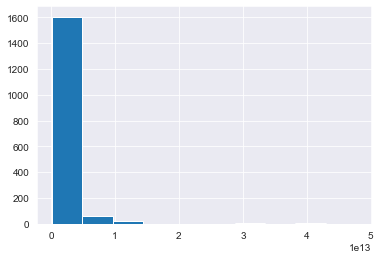

In [17]:
data1 = df['총세출예산금액']

plt.hist(data1, label = 'bins = 5')
plt.legend
plt.show()

In [18]:
df['총세출예산금액'] = df['총세출예산금액'].fillna(df['총세출예산금액'].median())

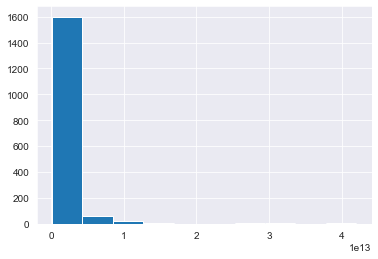

In [19]:
data2 = df['이전년도세출예산금액']

plt.hist(data2)
plt.legend
plt.show()

In [20]:
df['이전년도세출예산금액'] = df['이전년도세출예산금액'].fillna(df['이전년도세출예산금액'].median())

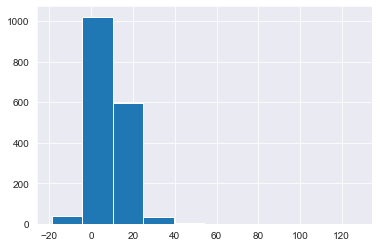

In [21]:
data3 = df['세출예산증감율']

plt.hist(data3)
plt.legend
plt.show()

In [22]:
df['세출예산증감율'] = df['세출예산증감율'].fillna(df['세출예산증감율'].median())

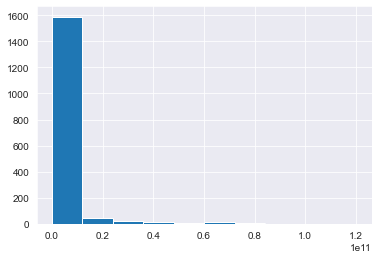

In [23]:
data4 = df['문화관광예산금액']

plt.hist(data4)
plt.legend
plt.show()

In [24]:
df['문화관광예산금액'] = df['문화관광예산금액'].fillna(df['문화관광예산금액'].median())

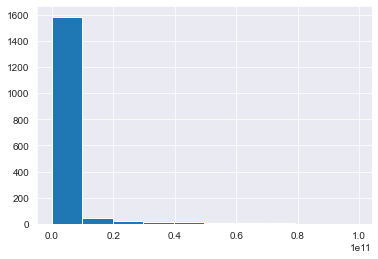

In [25]:
data5 = df['이전년도문화관광예산금액'] 
plt.hist(data5)
plt.legend
plt.show()

In [26]:
df['이전년도문화관광예산금액'] = df['이전년도문화관광예산금액'].fillna(df['이전년도문화관광예산금액'].median())

In [27]:
data6 = df['문화관광예산증감율']

In [28]:
data6.describe()

count     1647.000000
mean       130.685149
std       1242.245240
min       -100.000000
25%        -29.355000
50%          8.440000
75%         68.930000
max      45776.870000
Name: 문화관광예산증감율, dtype: float64

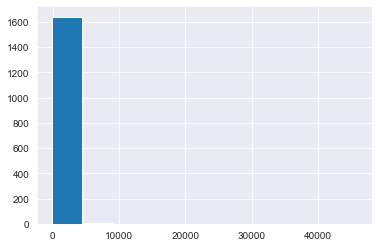

In [29]:
plt.hist(data6, label = 'bins = (0, 15000, 10000)')
plt.legend
plt.show()

In [30]:
df['문화관광예산증감율'] = df['문화관광예산증감율'].fillna(df['문화관광예산증감율'].median())

In [31]:
data7 = df['문화관광예산비율']

In [32]:
data7.describe()

count    1701.000000
mean        0.241052
std         0.381225
min         0.000000
25%         0.040000
50%         0.120000
75%         0.290000
max         3.740000
Name: 문화관광예산비율, dtype: float64

In [33]:
data7.isnull().sum()

3

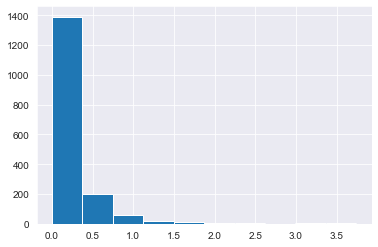

In [34]:
plt.hist(data7, label = 'bins = (0, 3, 0.25)')
plt.legend
plt.show()

In [35]:
df['문화관광예산비율'] = df['문화관광예산비율'].fillna(df['문화관광예산비율'].median())

In [36]:
data8 = df['1인당문화관광예산금액']

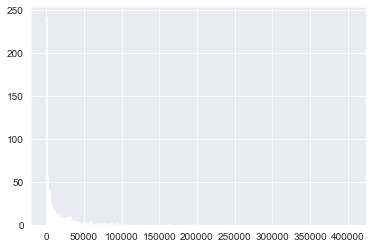

In [37]:
plt.hist(data8, bins = 1000)
plt.legend
plt.show()

In [38]:
data8.describe

<bound method NDFrame.describe of 0        5714.0
1        2521.0
2        1106.0
3          94.0
4         154.0
         ...   
1699    86991.0
1700    17258.0
1701     4747.0
1702    49328.0
1703    28855.0
Name: 1인당문화관광예산금액, Length: 1704, dtype: float64>

In [39]:
df['1인당문화관광예산금액'] = df['1인당문화관광예산금액'].fillna(df['1인당문화관광예산금액'].median())

### 결측치 다 채워진거 확인하기

In [40]:
df.isnull().sum()

컬럼한글명
일련번호            0
회계년도            0
행정기관코드          0
행정기관명           0
총세출예산금액         0
이전년도세출예산금액      0
세출예산증감율         0
문화관광예산금액        0
이전년도문화관광예산금액    0
문화관광예산증감율       0
문화관광예산비율        0
총인구수            0
1인당문화관광예산금액     0
dtype: int64